# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

### **1. Data Collection**

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# helps to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Upload Dataset in Google colab
from google.colab import files
PATH = list(files.upload().keys())[0]

Saving customer_booking.csv to customer_booking.csv


Chardet is a Python library that is used to automatically detect the encoding of text. It is short for "charset detection" and is commonly used to determine the character encoding of web pages and other text files.

In [4]:
import chardet

with open('/content/customer_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [5]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [7]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
mapping = {"Mon": 1,"Tue": 2,"Wed": 3,"Thu": 4,"Fri": 5,"Sat": 6,"Sun": 7,}

df["flight_day"] = df["flight_day"].map(mapping)

In [9]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [10]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### **2. Exploratory Data Analysis (EDA)**

In [11]:
# Checking null values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [12]:
# Number of duplicated rows
df.duplicated().sum()

719

In [13]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [14]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [15]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [16]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [17]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [18]:
df.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
40072,1,Internet,RoundTrip,14,5,12,4,KCHPER,Australia,0,1,0,5.62,0
25798,1,Internet,RoundTrip,16,2,3,3,COKSYD,Australia,1,0,1,8.58,0
13270,1,Internet,RoundTrip,10,39,12,2,HYDSYD,Australia,1,0,1,8.58,0
18182,1,Internet,RoundTrip,52,31,8,1,MAAMEL,India,1,0,1,8.83,0
13450,1,Internet,RoundTrip,134,110,15,6,HYDSYD,India,1,1,1,8.58,0
46513,2,Internet,RoundTrip,6,6,12,3,HKTPER,Australia,0,0,1,5.62,0
7367,1,Internet,RoundTrip,60,35,9,3,CTSDMK,Thailand,1,0,0,8.67,1
37818,4,Internet,RoundTrip,24,5,5,2,DPSPVG,China,0,0,0,5.33,0
16298,1,Internet,RoundTrip,228,62,6,2,KCHPER,Australia,1,0,1,5.62,0
42867,1,Internet,RoundTrip,190,6,4,4,BKIPUS,South Korea,0,0,0,6.33,1


### **3. Visualization**

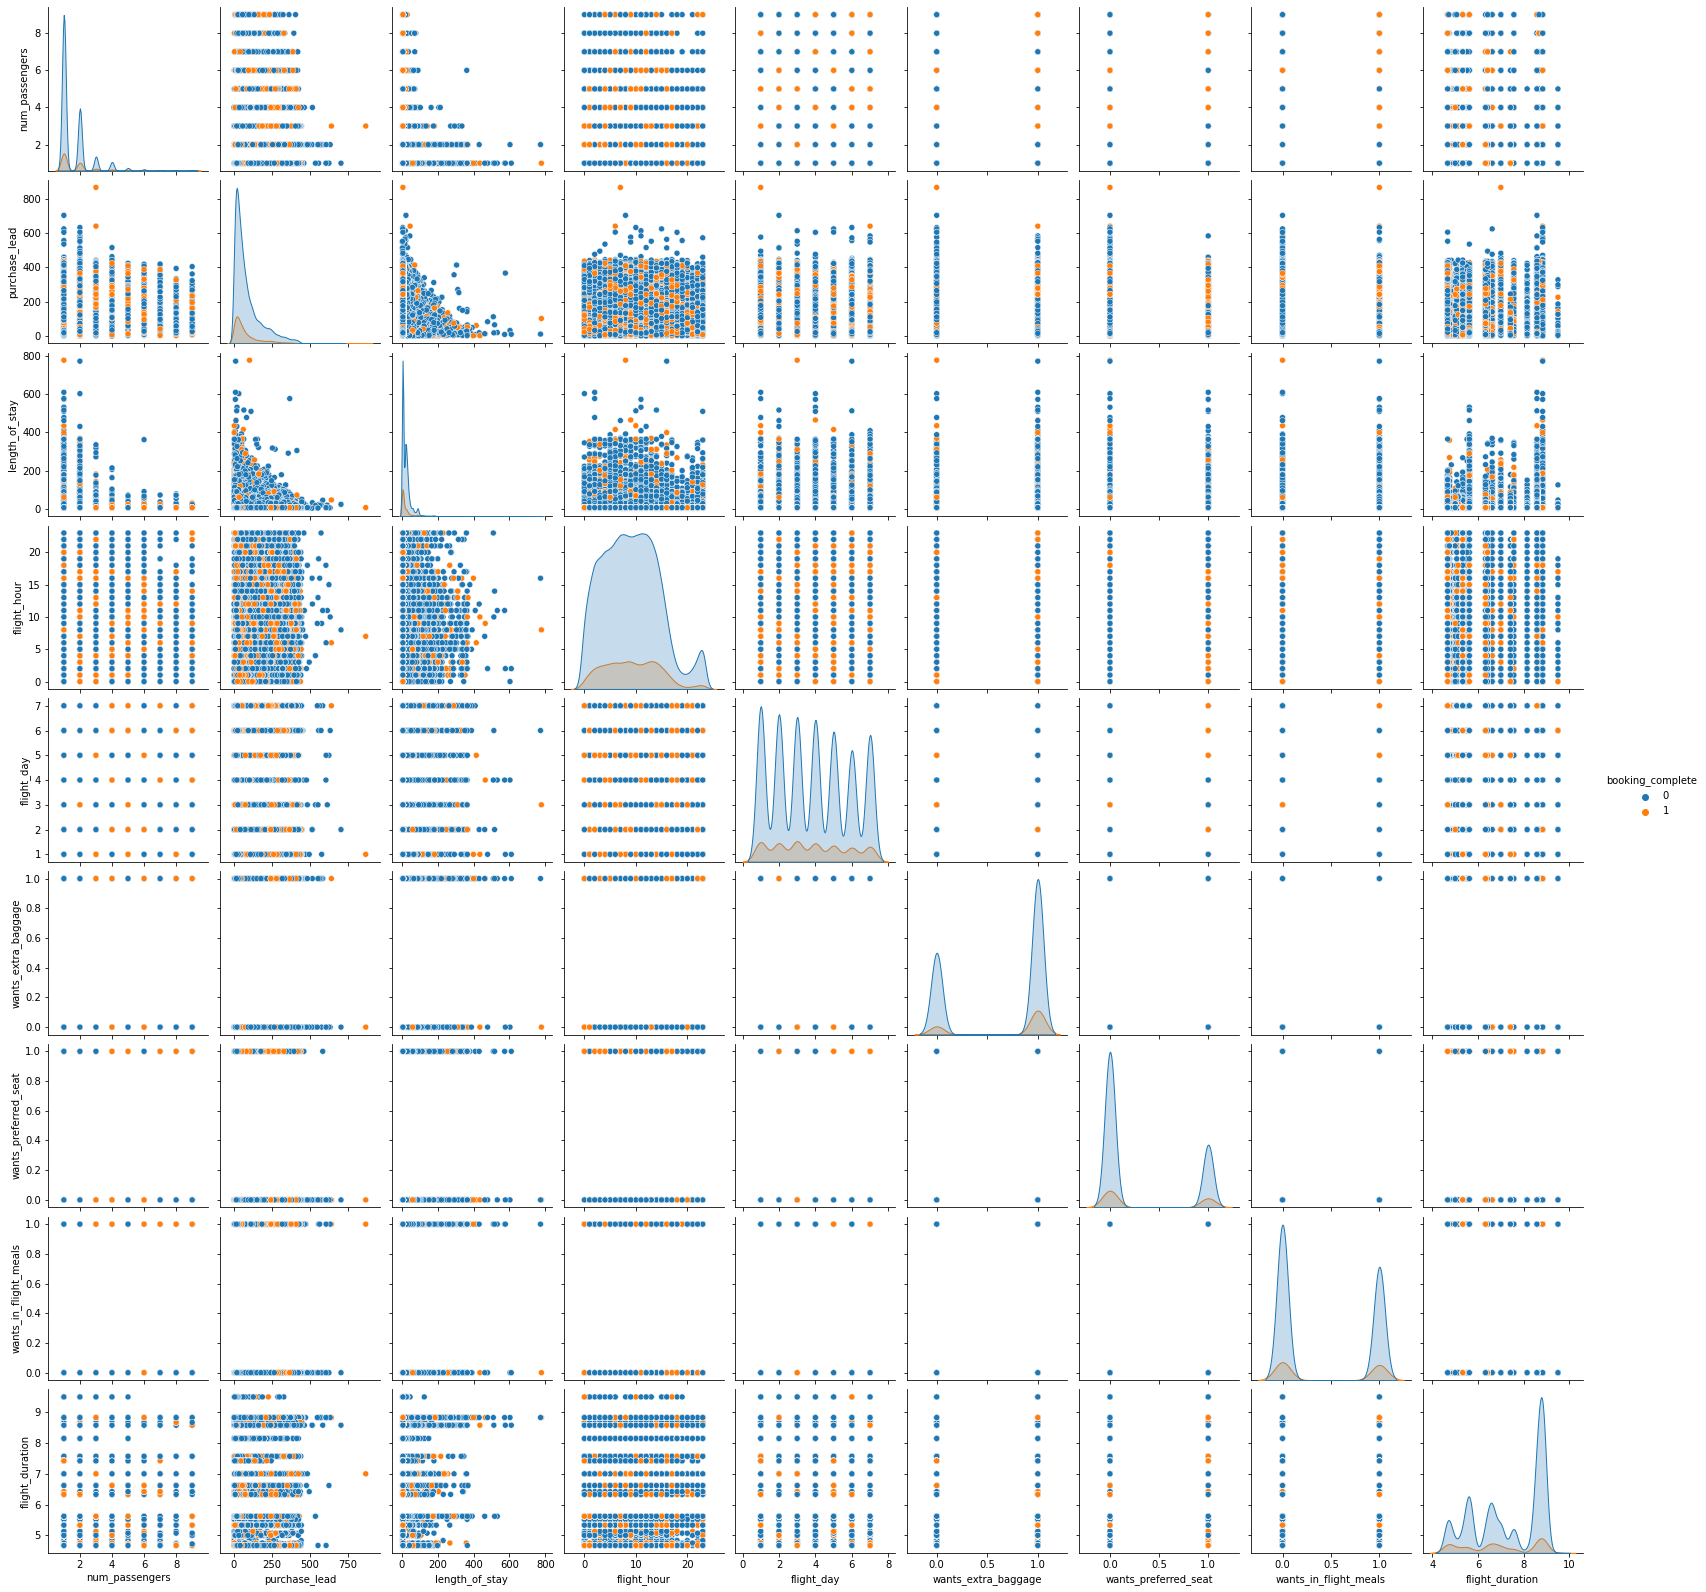

In [ ]:
# Relationship between numerical columns with booking_complete or not
sns.pairplot(df[['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day',
                 'wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration','booking_complete']],hue='booking_complete')

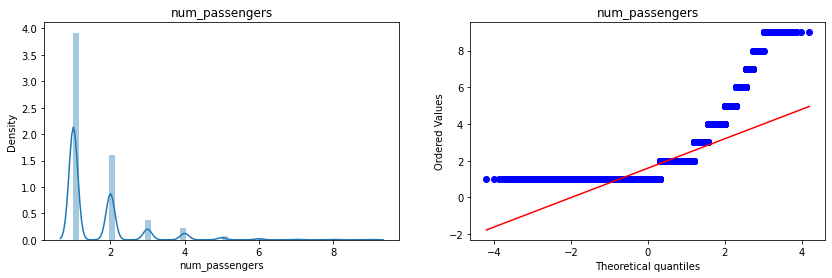

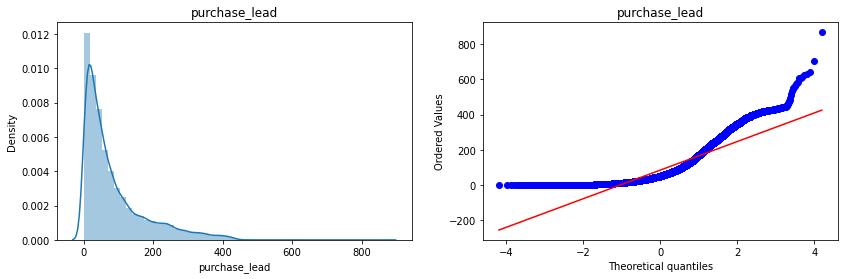

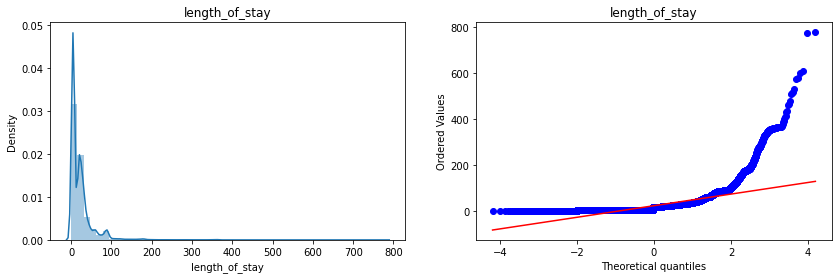

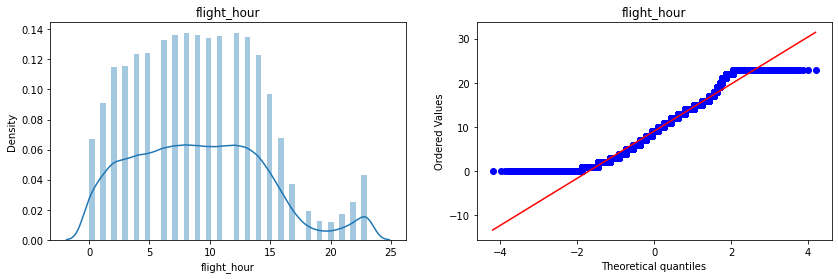

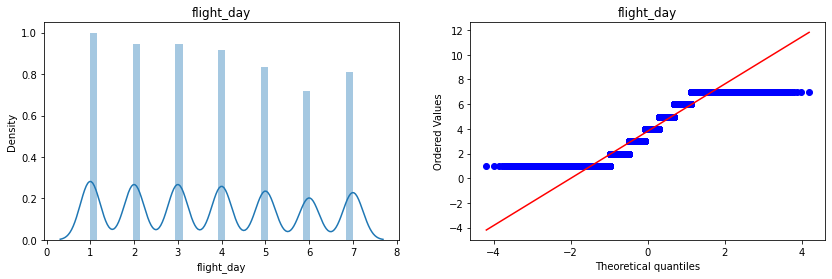

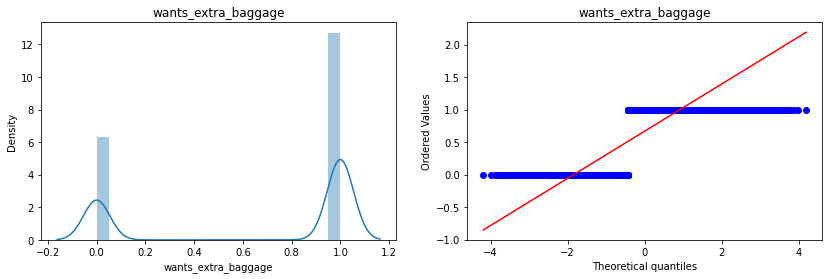

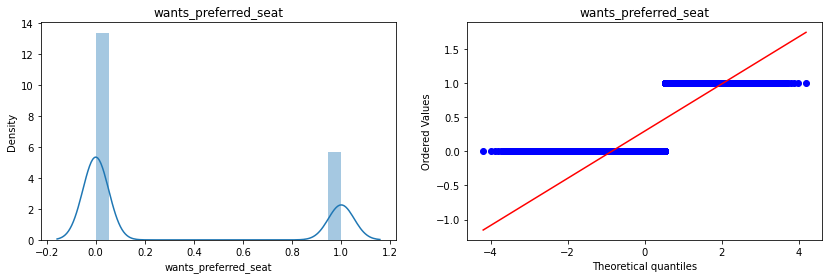

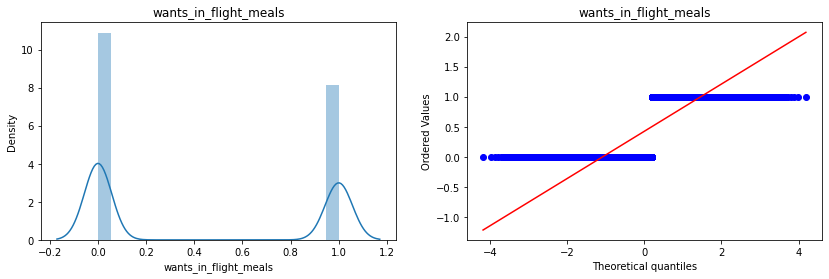

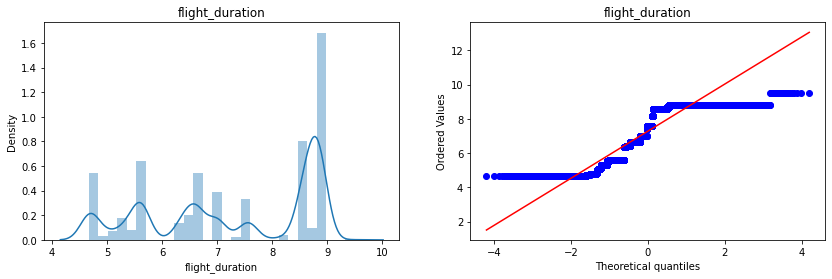

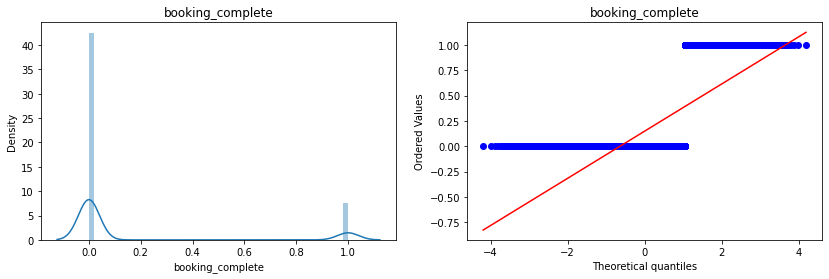

In [ ]:
# distplot ploting shows data linear or not
import scipy.stats as stats

for col in df[['num_passengers','purchase_lead','length_of_stay','flight_hour','flight_day',
                 'wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration','booking_complete']]:

                 plt.figure(figsize=(14,4))
                 plt.subplot(121)
                 sns.distplot(df[col])
                 plt.title(col)

                 plt.subplot(122)
                 stats.probplot(df[col],dist='norm',plot=plt)
                 plt.title(col)

                 plt.show()

### **3. Feature Importance**

It is a function provided by the scikit-learn machine learning library in Python. It is used for feature selection in classification tasks, based on the concept of mutual information. Mutual information is a measure of the amount of information that one variable provides about another variable. In the context of feature selection, mutual information is used to estimate the dependence between a feature and the target variable.

**mutual_info_classif** is specifically designed for classification problems, where the target variable is categorical. It computes the mutual information between each feature and the target variable, and returns an array of scores, where each score corresponds to a feature.

The **mutual_info_classif** function can be useful in feature selection or feature engineering tasks, where we want to identify the most informative features that are relevant for predicting the target variable. By selecting the top-ranked features based on their mutual information score, we can reduce the dimensionality of the feature space and potentially improve the performance of a classification model.

In [19]:
x = df.drop('booking_complete',axis=1)
y = df.booking_complete

**Encode categorical variable as numerical values**

The function return two objects,an array of uniquenumerical values representing the categories, and an array of integers representing the category codes for each input value.

Changeing object dtype to int dtype

In [20]:
# Changing object dtype to int dtype
for column_name in x.select_dtypes('object'):
  x[column_name],_ = x[column_name].factorize()

In [21]:
x.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [22]:
# Feature Importance
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# show a few features with their MI scores
mi_scores 

route                    0.050568
booking_origin           0.048120
flight_duration          0.017572
length_of_stay           0.009350
wants_extra_baggage      0.007778
wants_in_flight_meals    0.004783
num_passengers           0.004088
wants_preferred_seat     0.003232
flight_hour              0.002326
purchase_lead            0.002121
flight_day               0.001020
sales_channel            0.000000
trip_type                0.000000
Name: MI Scores, dtype: float64

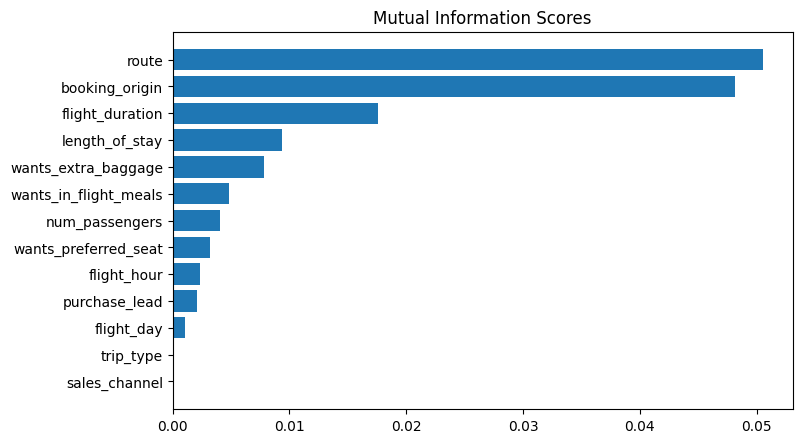

In [23]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

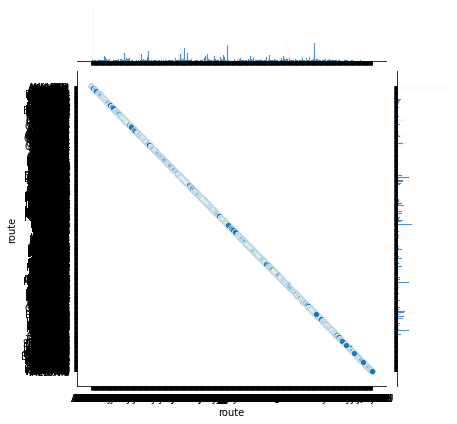

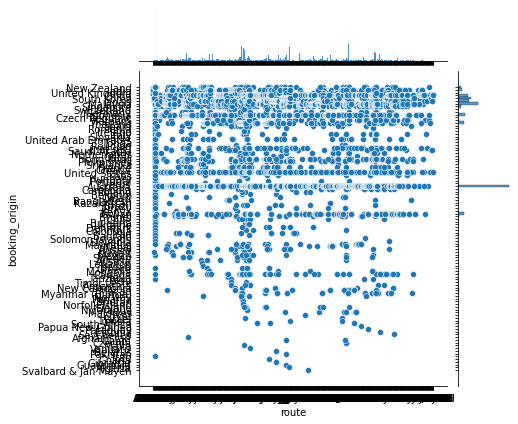

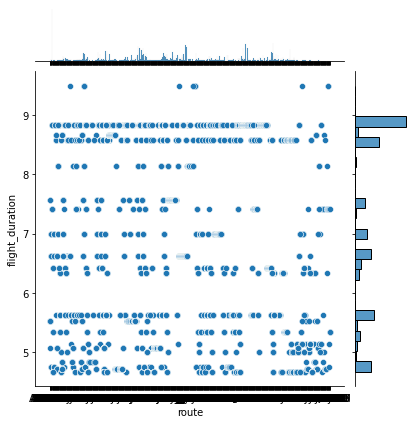

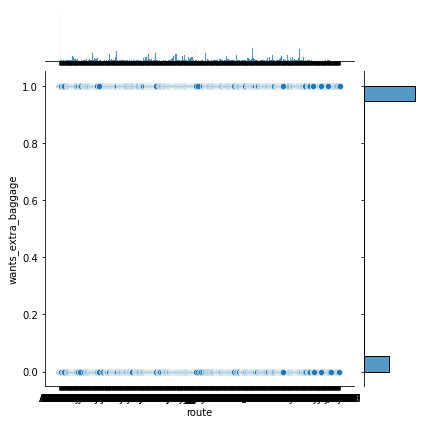

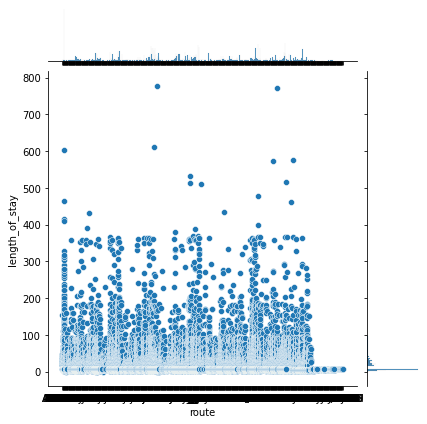

In [ ]:
for col in ['route','booking_origin','flight_duration','wants_extra_baggage','length_of_stay']:
  sns.jointplot(data=df,x='route',y=col)

### **5. Train_test_split**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('booking_complete',axis=1),
                                                 df.booking_complete,
                                                 test_size=0.2,random_state = 2)

x_train.shape,x_test.shape

((40000, 13), (10000, 13))

### **4. Feature Scaling**

MinMax scaling is a type of data normalization that is commonly used in machine learning to transform numerical data into a range between 0 and 1. The process involves subtracting the minimum value in the data set from each data point and then dividing the result by the range of the data set (i.e., the difference between the maximum and minimum values).

The formula for MinMax scaling is as follows:

x_scaled = (x - min(x)) / (max(x) - min(x))

### **5. One-Hot-Encoding (ohe)**

It is a technique used to represent categorical variables as numerical data in machine learning. In this technique, each category is represented as a binary vector, with one element of the vector set to 1 and all others set to 0.

### **6. Model_Selection**

#### **Model 1 : Random forest classifier with top 6 features**

**Coloumn Transformer**

In [25]:
from sklearn.compose import ColumnTransformer

In [26]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder

trf1 = ColumnTransformer([
    ('ohe_df',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,7,8])
],remainder="passthrough")

This is a slice object that selects the first 10 columns of the DataFrame. You can use this slice object to apply the scaling only to a subset of the columns in the DataFrame.

In [27]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

trf2 = ColumnTransformer([
    ('scale_df',MinMaxScaler(),slice(0,10))
])

**SelectKBest** is a class that allows you to select the K best features from a given dataset, based on a statistical test. It works by scoring each feature based on its relationship with the target variable and then selecting the K features with the highest scores. 

**chi2** is a statistical test that measures the independence between two categorical variables. It is often used in feature selection for classification problems, where the target variable is categorical. When used as the scoring function for **SelectKBest**, it calculates the chi-squared statistic between each feature and the target variable, and selects the K features with the highest chi-squared scores.

Together, **SelectKBest** and **chi2** can be used to reduce the dimensionality of a dataset by selecting only the most relevant features for a given classification problem. This can help to improve the accuracy and efficiency of machine learning models, by reducing overfitting and computational complexity.

In [28]:
# Select Most Effective Columns
from sklearn.feature_selection import SelectKBest,chi2

trf3 = SelectKBest(score_func = chi2,k=6)
# Taking top 6 feature

In [30]:
# Train Model
from sklearn.ensemble import RandomForestClassifier

trf4 = RandomForestClassifier(oob_score=True,random_state=42)

**Create Pipeline**

In [31]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4)
])

In [32]:
# Display the pipeline
from sklearn import set_config
set_config(display='diagram')

pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_df',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 7, 8])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale_df', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf3',
                 SelectKBest(k=6,
                             score_func=<function chi2 at 0x7f522f945550>)),
                ('trf4',
                 RandomForestClassifier(oob_score=True, random_state=42))])

In [33]:
# Accuracy score and Cross Validation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

y_pred = pipe.predict(x_test)
print('Accuracy_score :',accuracy_score(y_test,y_pred)*100)
print('Cross_validation :',cross_val_score(pipe,x_train,y_train,cv=5,scoring='accuracy').mean())

Accuracy_score : 85.24000000000001
Cross_validation : 0.84995


#### **Model 2 : Random forest classifier with All features**

In [36]:
trf_1 = ColumnTransformer([
    ('ohe_df',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,7,8])
],remainder="passthrough")

trf_2 = ColumnTransformer([('scale_df',MinMaxScaler(),slice(0,10))])

trf_4 = RandomForestClassifier(oob_score=True,random_state=42)

pipe1 = Pipeline([('trf_1',trf_1),('trf_2',trf_2),('trf_4',trf_4)])

pipe1.fit(x_train,y_train)
y_pred = pipe1.predict(x_test)

print('Accuracy_score :',accuracy_score(y_test,y_pred)*100)
print('Cross_validation :',cross_val_score(pipe,x_train,y_train,cv=5,scoring='accuracy').mean())

Accuracy_score : 85.24000000000001
Cross_validation : 0.84995


#### **Model 3 : XGB classifier with top 6 features**

In [37]:
trf_1 = ColumnTransformer([
    ('ohe_df',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,7,8])
],remainder="passthrough")

trf_2 = ColumnTransformer([('scale_df',MinMaxScaler(),slice(0,10))])

trf_3 = SelectKBest(score_func = chi2,k=6)

from xgboost import XGBClassifier
trf_4 = XGBClassifier()

pipe1 = Pipeline([('trf_1',trf_1),('trf_2',trf_2),('trf_3',trf_3),('trf_4',trf_4)])

pipe1.fit(x_train,y_train)
y_pred = pipe1.predict(x_test)

print('Accuracy_score :',accuracy_score(y_test,y_pred)*100)
print('Cross_validation :',cross_val_score(pipe,x_train,y_train,cv=5,scoring='accuracy').mean())

Accuracy_score : 85.24000000000001
Cross_validation : 0.84995


#### **Model 4 : XGB classifier with all features**

In [38]:
trf_1 = ColumnTransformer([
    ('ohe_df',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,7,8])
],remainder="passthrough")

trf_2 = ColumnTransformer([('scale_df',MinMaxScaler(),slice(0,10))])

from xgboost import XGBClassifier
trf_4 = XGBClassifier()

pipe1 = Pipeline([('trf_1',trf_1),('trf_2',trf_2),('trf_4',trf_4)])

pipe1.fit(x_train,y_train)
y_pred = pipe1.predict(x_test)

print('Accuracy_score :',accuracy_score(y_test,y_pred)*100)
print('Cross_validation :',cross_val_score(pipe,x_train,y_train,cv=5,scoring='accuracy').mean())

Accuracy_score : 85.24000000000001
Cross_validation : 0.84995
